In [24]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import animation as anim
from anim_scripts.Lecture_1.detuning.utils import (
    initialize_ax_dict,
    fade_in_texts,
    calculate_labframe_B_fields,
    calculate_rotating_frame_B_fields,
    update_bloch_sphere_vectors,
)
from anim_base import (
    cache_then_save_funcanimation,
    prepare_bloch_mosaic,
    PrettyAxis,
    file_type
)

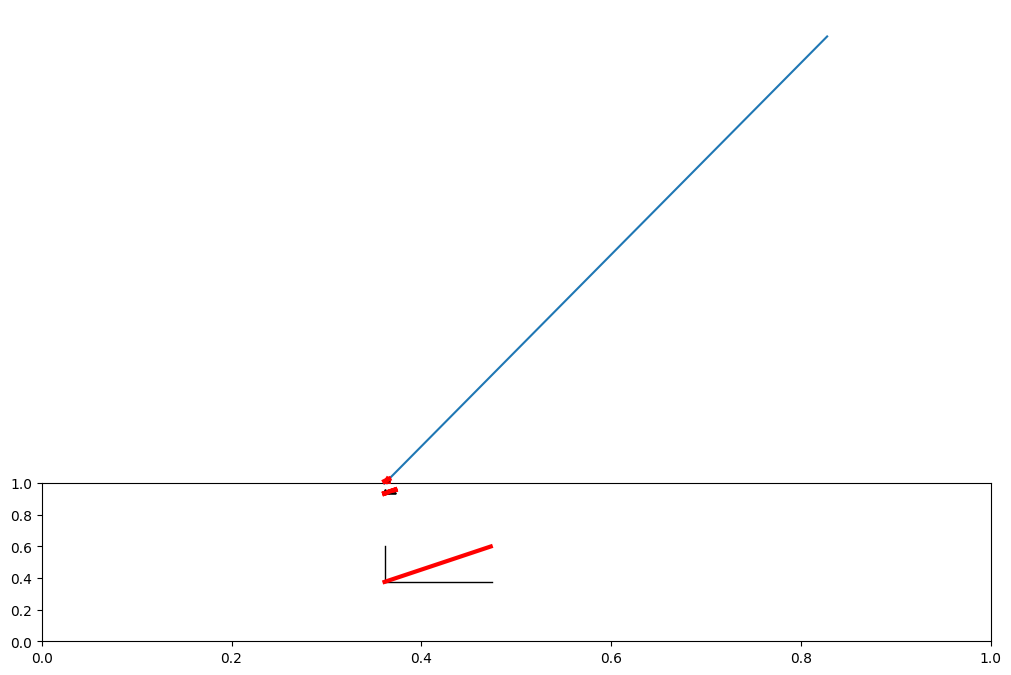

In [46]:
new_axis.set_position([0.1, 0.1, 1, 1])
pretty_axis = PrettyAxis(new_axis, (0, 24, -24*1 + 2), (-24*1 + 2, -24*1/2 - 2, 0), (0, 100), (0, 100), alpha=1)
new_axis.set_axis_off()
pretty_axis.add_line("test", np.arange(100), np.arange(100), "r", lw=3)
fig

In [53]:
ax_dict['bloch_lab'].azim

-60

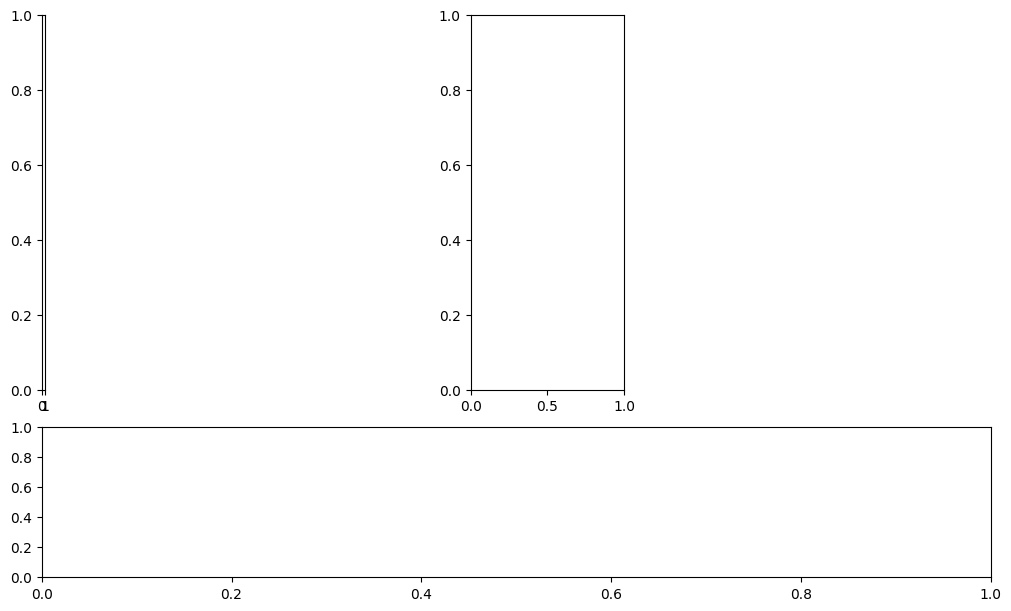

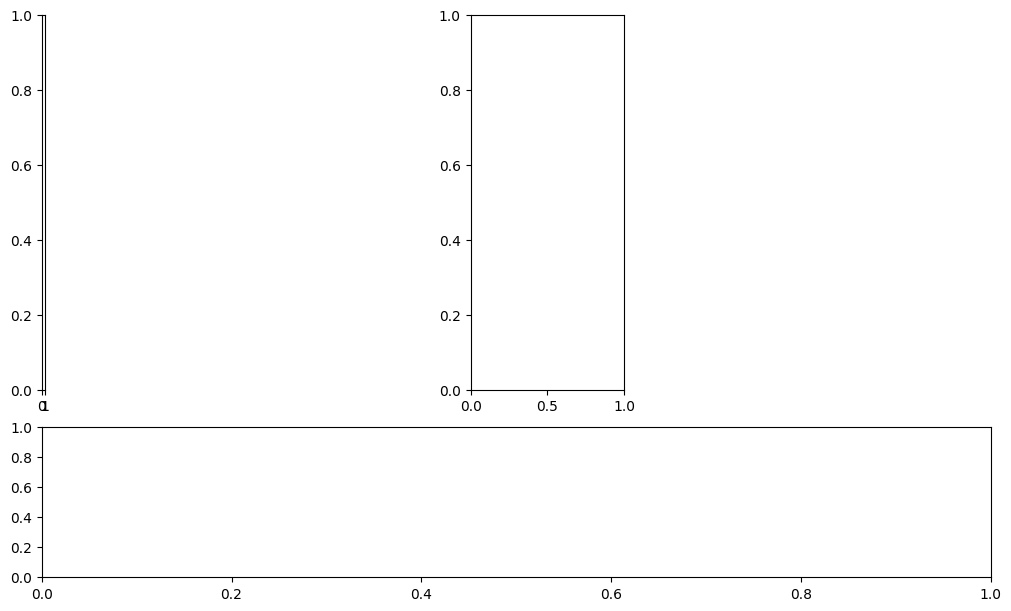

In [2]:
settings = {
    "B_x_max": 0.7,
    "B_zeeman_lab_z": 1,
    "phi_0": 0,
    "phi_end": 24*np.pi,
    "arrow_length": 0.2,
    # "time_list": time_list,
    "vector_colors": ["maroon", "hotpink", "red"],
}
bloch_mosaic = [["spin_plots", "bloch_lab", "plot_between", "bloch_rot"],
                ["plot", "plot", "plot", "plot"]]
bloch_kwargs = [{
    "vector_color": settings['vector_colors'],
    "vector_alpha" : [1,1,0],
    "vector_width": 6,
    },
    {
    "vector_color": settings['vector_colors'][:],
    "vector_width": 6,
    "xlabel": [r"$x^\prime$", ''],
    "ylabel": [r"$y^\prime$", '']
    }
]

gridspec_kw = {"height_ratios":[1,0.4], "width_ratios":[0.01, 1, 0.5, 1]}
fig, ax_dict, sphere_dict = prepare_bloch_mosaic(bloch_mosaic, (10,6), bloch_kwargs, gridspec_kw=gridspec_kw)

fig


In [3]:
initialize_ax_dict(ax_dict, settings)

((Text(-1.35, 0.2, '$H \\; =$'),
  Text(-1.13, 0.2, '$H_{\\mathrm{Zeeman}} + $'),
  Text(-0.7, 0.2, '$H_{\\mathrm{driving}} \\; = \\;$'),
  Text(-1.55, 0.1, '$=\\omega_L S_z + $'),
  Text(-1.1, 0.1, '$h [ S_x \\: \\mathrm{cos}(\\omega t) + S_y \\: \\mathrm{sin}(\\omega t) ]$')),
 (Text(0.9, 0.2, '$H \\prime \\; =$'),
  Text(1.15, 0.2, '$H \\prime _{\\mathrm{Zeeman}} + $'),
  Text(1.6, 0.2, '$H \\prime _{\\mathrm{driving}} \\; = \\;$'),
  Text(1.04, 0.1, '$=( \\omega_L - \\omega )  S \\prime _z + $'),
  Text(1.75, 0.1, '$h S \\prime _x = $'),
  Text(1.38, 0.0, '$=h S \\prime _x$')),
 (Text(0.1, 0.3, '$W = \\mathrm{exp}(-i \\omega t S_z)$'),
  Text(0.25, 0.75, '$\\omega = \\omega_L$')))

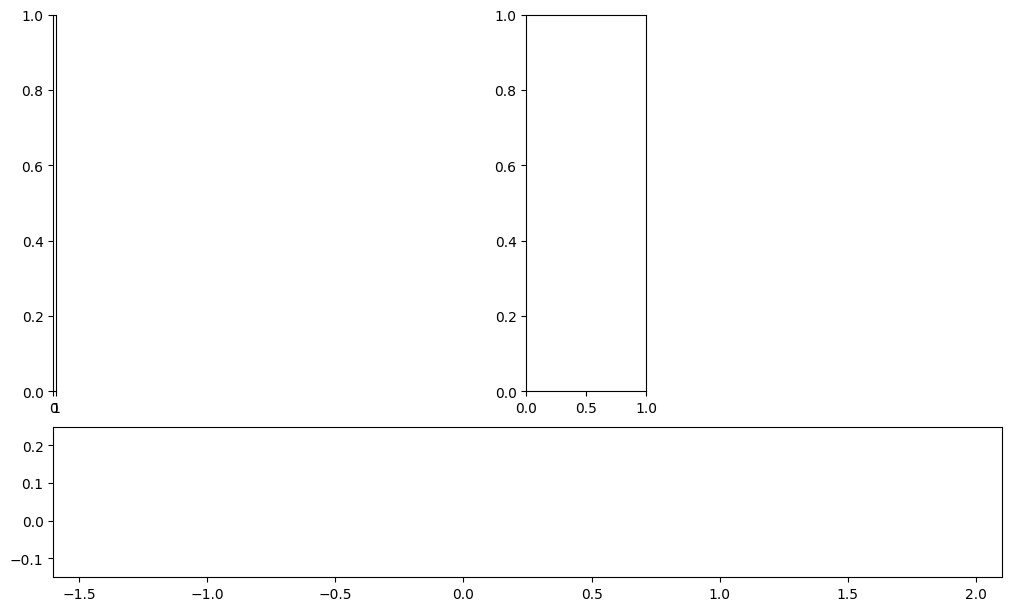

In [4]:
sphere_dict['bloch_rot'].frame_alpha = 0
sphere_dict['bloch_rot'].sphere_alpha = 0
sphere_dict['bloch_rot'].frame_color = 'white'
sphere_dict['bloch_rot'].frame_width = 0
sphere_dict['bloch_rot'].font_color = "white"
# sphere_dict['bloch_lab'].make_sphere()

sphere_dict['bloch_rot'].make_sphere()

# ax_dict['bloch_lab']
# ax_dict['bloch_lab'].plot([0,0], [0,0], [0,1], color='black', linestyle='--', alpha=0.5)
# ax_dict['bloch_lab'].set_position([0.01, 0.01, 0.01, 0.01])
# ax_dict['spin_plots'].set_position([0.01, 0.85, 0.3, 0.4])
# ax_dict['spin_plots'].plot([0,0], [0,0], [0,1], color='black', linestyle='--', alpha=0.5)
fig

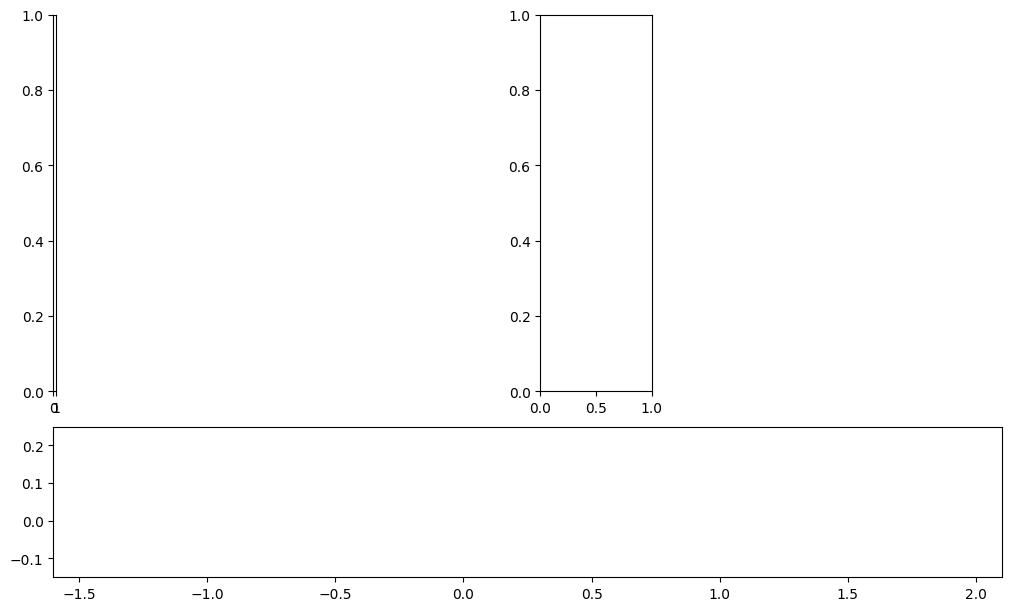

In [5]:
ax_dict['bloch_rot'].get_position()
new_pos = ax_dict['bloch_rot'].get_position()
new_pos = [
    new_pos.x0,
    new_pos.y0,
    new_pos.width,
    new_pos.height
]
ax_dict['bloch_rot'].set_position(new_pos)
ax_dict['bloch_rot'].sphere_alpha = 0.4
ax_dict['bloch_rot'].frame_alpha = 0.4
ax_dict['bloch_rot'].frame_color = (1,1,1,0.4)
# ax_dict['bloch_rot'].get_position()
fig

In [6]:
ax_dict['bloch_rot']

<Axes3D: >

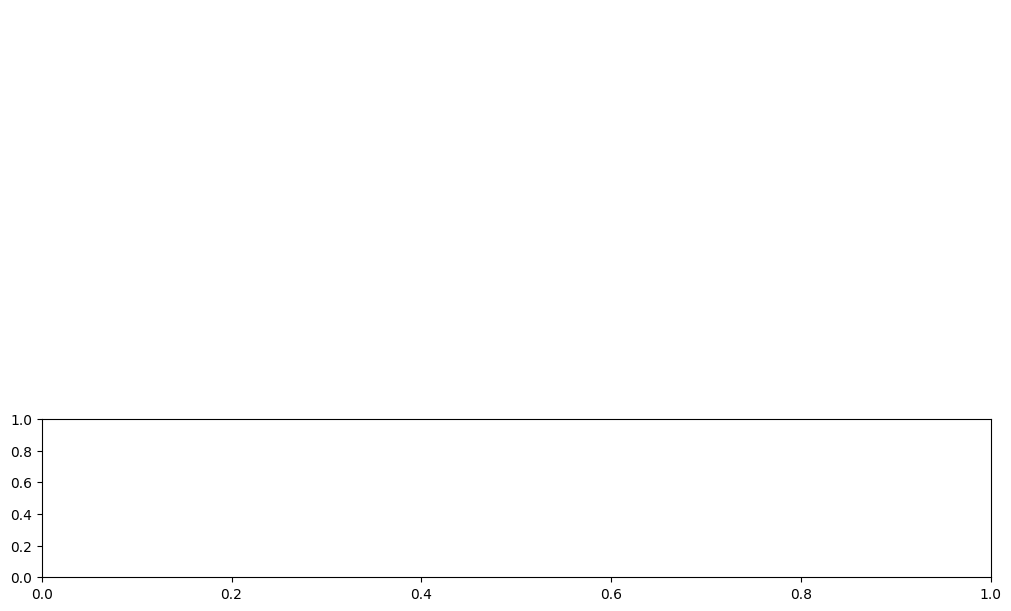

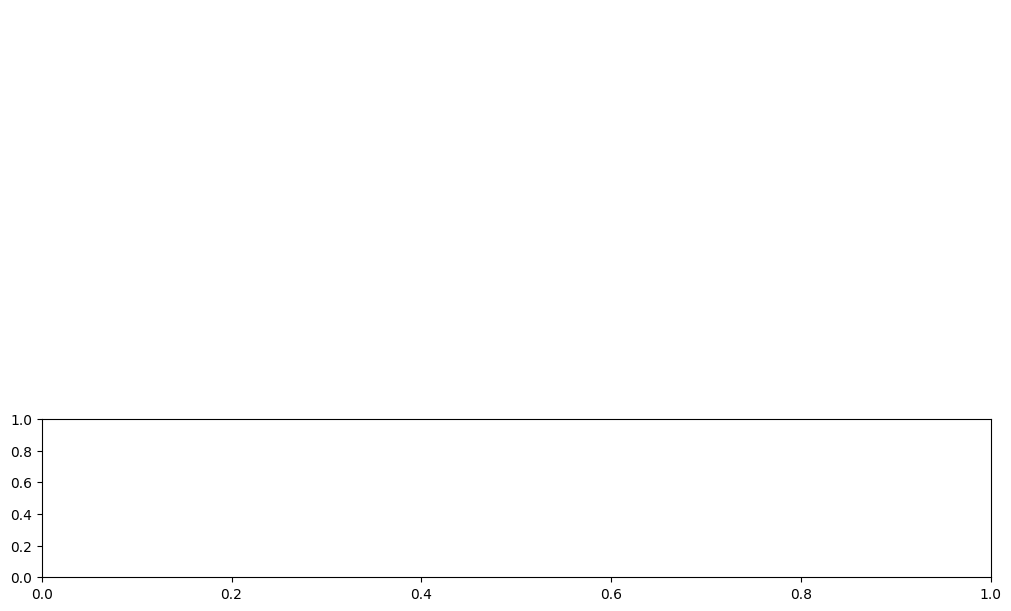

In [14]:
bloch_mosaic = [["bloch_lab", "bloch_rot"],
                ["plot", "plot"]]
bloch_kwargs = [{
    "vector_color": settings['vector_colors'],
    "vector_alpha" : [1,1,0],
    "vector_width": 6,
    },
    {
    "vector_color": settings['vector_colors'][:],
    "vector_width": 6,
    "xlabel": [r"$x^\prime$", ''],
    "ylabel": [r"$y^\prime$", '']
    }
]

gridspec_kw = {"height_ratios":[1, 0.4], "width_ratios":[1, 1]}
fig, ax_dict, sphere_dict = prepare_bloch_mosaic(bloch_mosaic, (10,6), bloch_kwargs, gridspec_kw=gridspec_kw)
fig

In [8]:
sphere_dict['bloch_rot'].

SyntaxError: invalid syntax (4284729234.py, line 1)

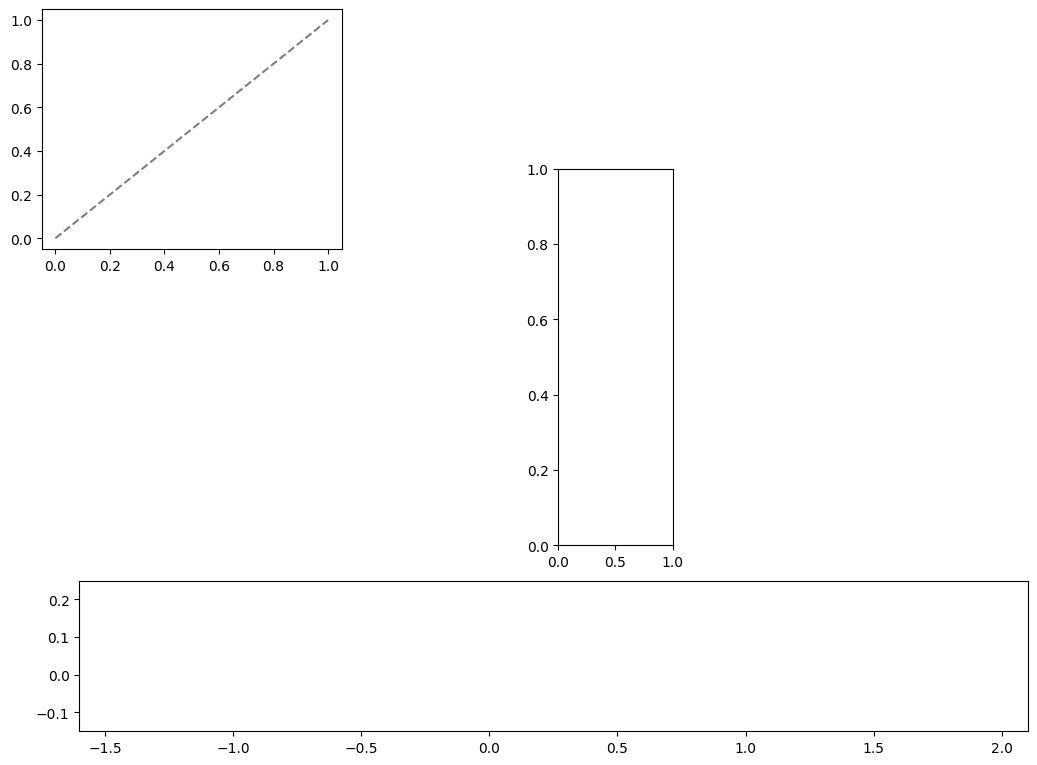

In [ ]:
fig.delaxes(ax_dict['bloch_rot'])  # Remove the axes
fig

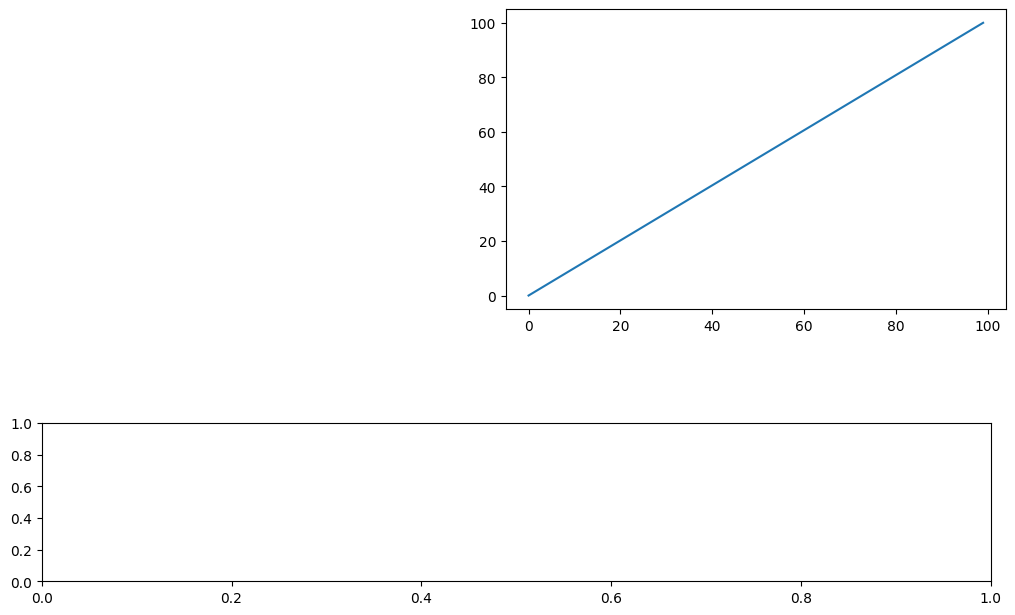

In [15]:
new_axis = fig.add_axes((0.5, 0.5, 0.5, 0.5))
new_axis.plot(np.linspace(0, 100, 100))

fig

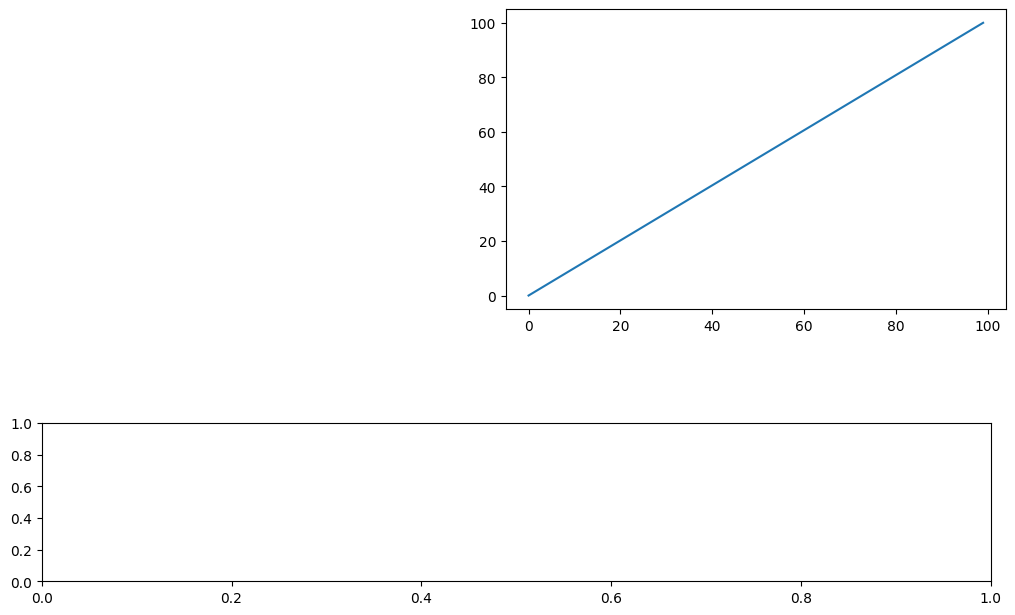

In [19]:
current_pos = new_axis.get_position()
fig

In [23]:
current_pos.width

np.float64(0.5)

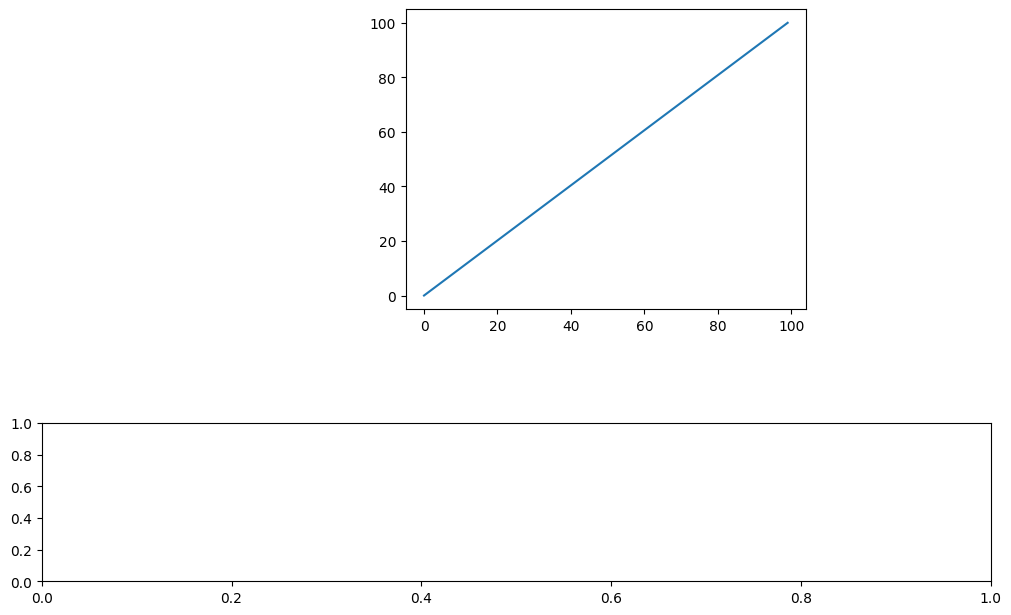

In [22]:
new_axis.set_position(
    [
        current_pos.x0 - 0.1,
        current_pos.y0,
        current_pos.width - 0.1,
        current_pos.height
    ]
)
fig

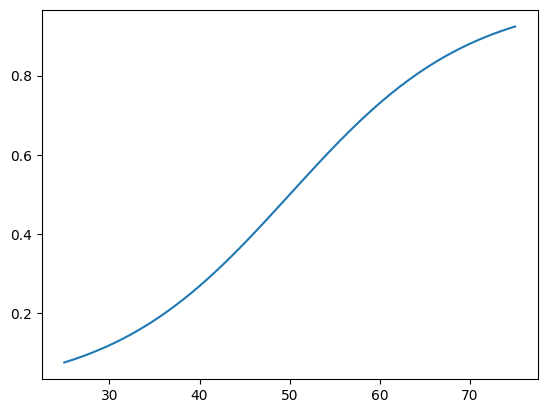

In [17]:
def sigmoid_between(x, x_start, x_end, y_start, y_end):
    return y_start + (y_end - y_start) / (1 + np.exp(-0.1*(x - (x_start + x_end)/2)))

x_plot = np.linspace(25, 75, 1000)
y = sigmoid_between(x_plot, 25, 75, 0, 1)
plt.plot(x_plot, y)


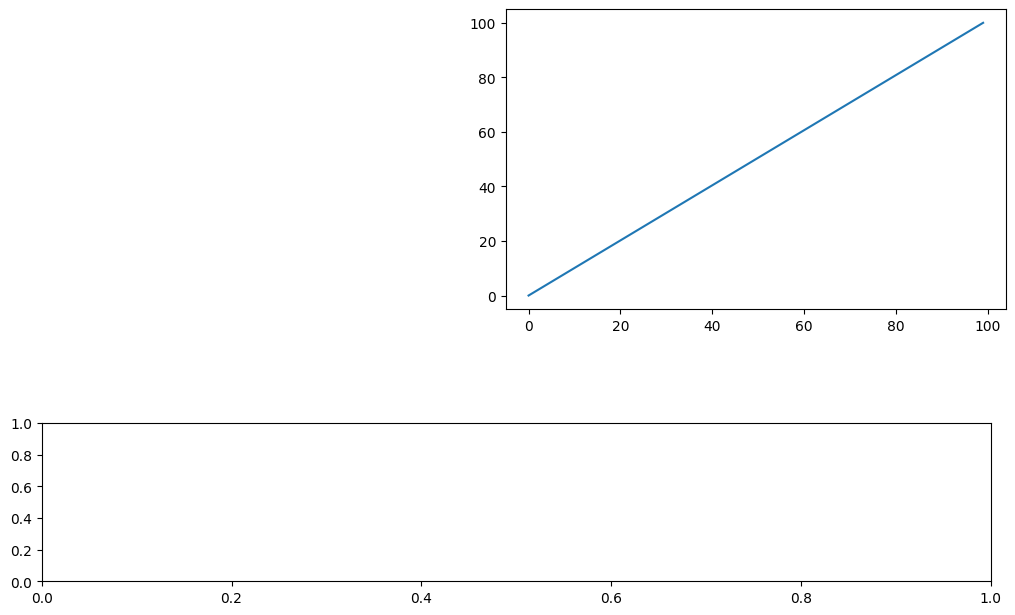

In [16]:
new_axis.set_alpha(0)
fig